In [46]:
import numpy as np
import re
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [47]:
def processData(pathTXT):
    best_y = []
    curr_y = []
    temp = []
    acceptance_pb = []
    acc_best_sol = []
    runtime = 0
    iteration_nbr = 0
    with open(pathTXT, "r") as file:
        for line in file:
            if(line.startswith("BEST")):
                runtime=0
            elif(line.startswith("Runtime")):
                runtime = float(re.sub("[^0-9^.]", "", line))
            elif(line.startswith("Nbr")):
                iteration_nbr = int(re.sub("[^0-9]", "", line))
            else:
                BEST_y, CURR_y, TEMP, ACCEPT_PB, ACC_BEST_Sol = line.split(",")
                best_y.append(float(BEST_y))
                curr_y.append(float(CURR_y))
                temp.append(float(TEMP))
                acceptance_pb.append(float(ACCEPT_PB))
                acc_best_sol.append(ACC_BEST_Sol[1:])
            
    best_y = np.asarray(best_y)
    curr_y = np.asarray(curr_y)
    temp = np.asarray(temp)
    acceptance_pb = np.asarray(acceptance_pb)
    
    return best_y, curr_y, temp, acceptance_pb, acc_best_sol, runtime, iteration_nbr
    


In [48]:
def drawPlot(best_y, curr_y, temp, acceptance_pb, acc_best_sol):
    x = np.arange(len(best_y))
    line1, = plt.plot(x, best_y, color='g')
    line2, = plt.plot(x, temp, color='orange')
    plt.scatter(x, curr_y, s=1, label='Current Solution', color='blue')
    plt.scatter(x, acceptance_pb*1000, s=1, label='Acceptance proba x1000', color='pink')


    line1.set_label('Best Solution')
    line2.set_label('Temperature')


    fig = plt.gcf()
    fig.set_size_inches(13,10)

    plt.legend()
    plt.yscale('log')
    plt.show()

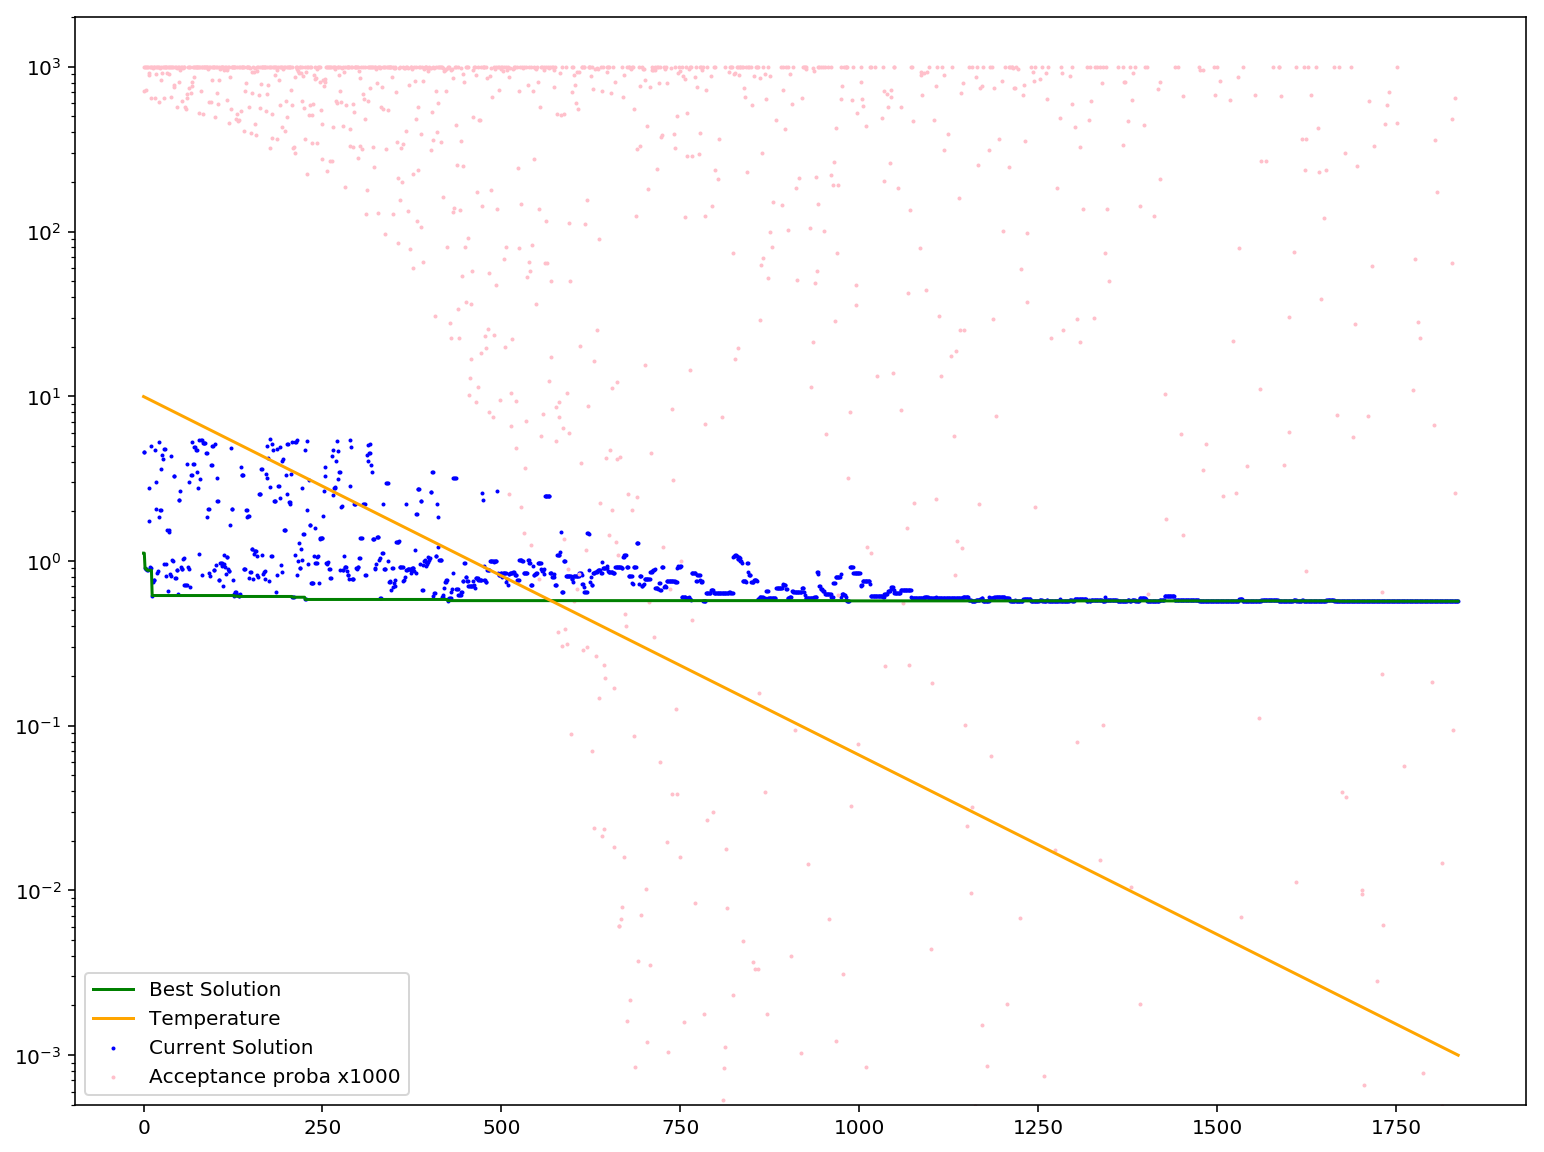

In [49]:
best_y, curr_y, temp, acceptance_pb, acc_best_sol, runtime, iteration_nbr = processData("../java/SimulatedAnnealing/GraphData/LSA_MinFunction.txt")
drawPlot(best_y, curr_y, temp, acceptance_pb, acc_best_sol)

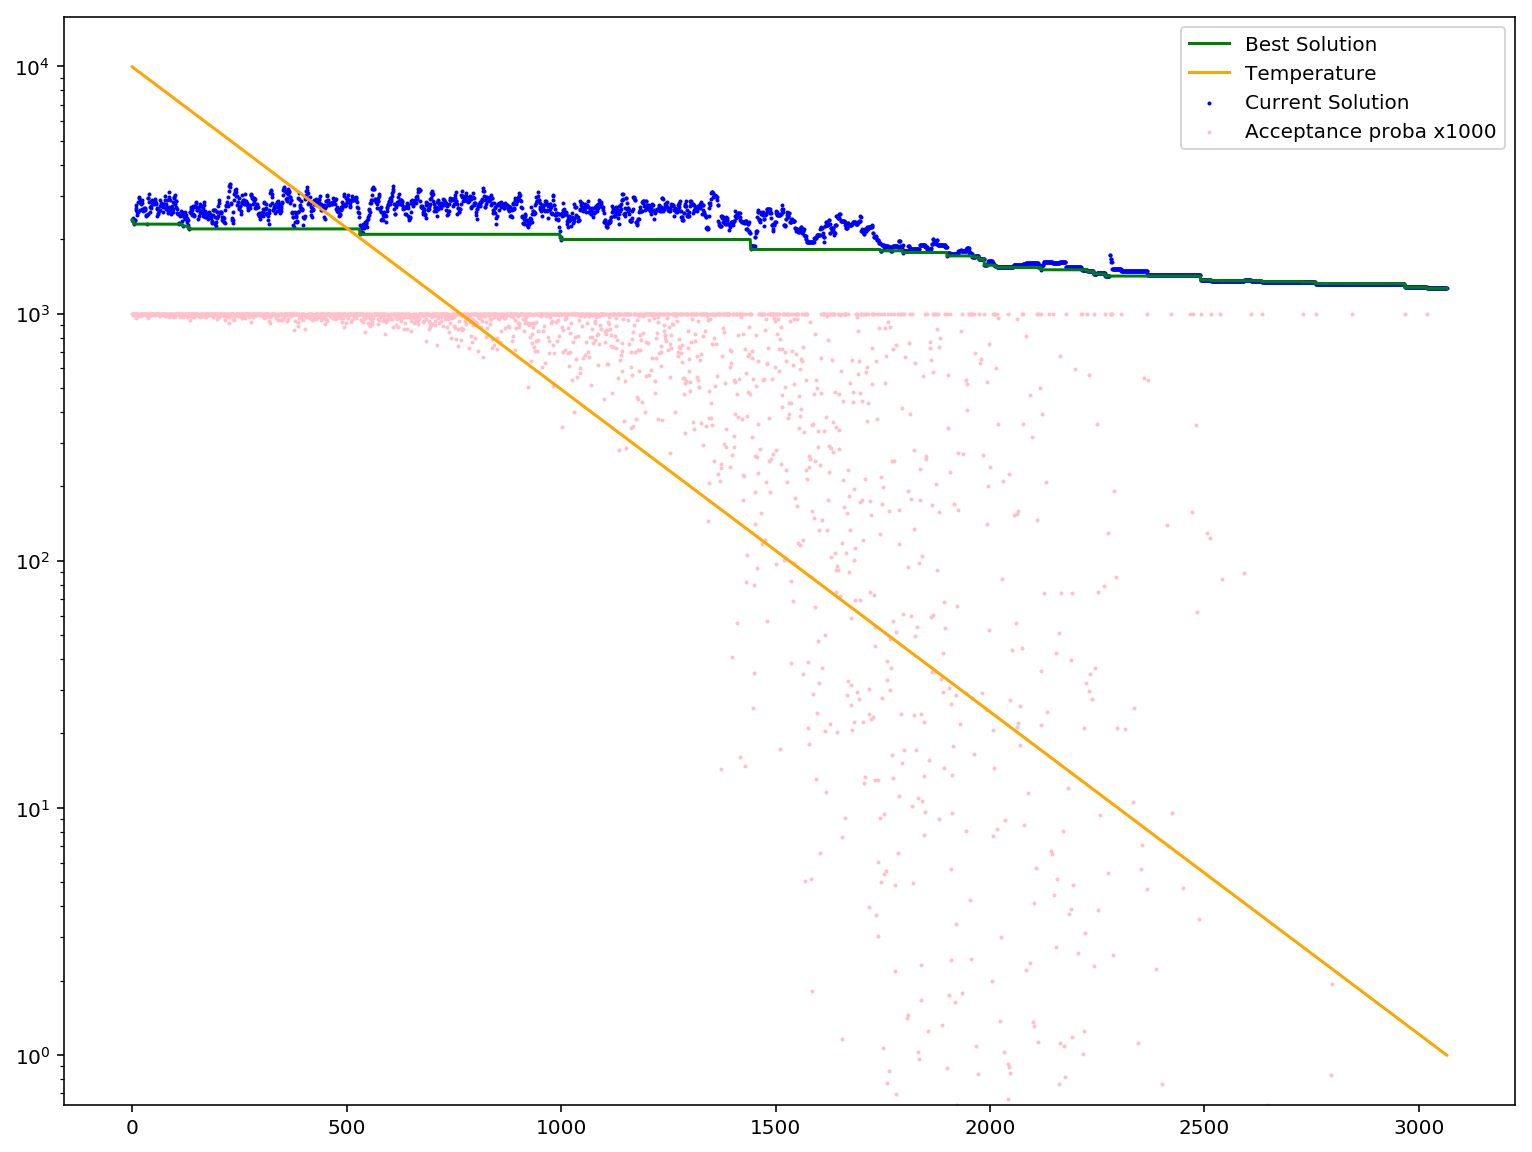

In [50]:
best_y, curr_y, temp, acceptance_pb, acc_best_sol, runtime, iteration_nbr = processData("../java/SimulatedAnnealing/GraphData/LSA_TSP.txt")
drawPlot(best_y, curr_y, temp, acceptance_pb, acc_best_sol)